For this dataset, I will focus on creating a repeatable data exploration while also considering the aspect of machine learning that could be utilizing in predicting prices from this dataset.

This is a blind brute force comparison between a mildly tuned neural network and a simple untuned linear regression. 
The linear regression outperforms the neural network in training speed, and accuracy. The main purpose was to get a deep neural network running using the keras layers for quick iterations. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
main = pd.read_csv("./train.csv")

In [3]:
main.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
main.shape

(1460, 81)

There is no way we can iteratively create automatic feature extractions from this dataset, there are only 1400 datapoints and around 80 attributes. If I do automatic feature extraction, I will likely end up with more columns than data points. 

Attributes I can drop
- Id, 

In [5]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

There are 11 floats, 26 integers, and 43 objects. 
Objects should be strings, integers are integers, and floats could be a mix of strings and integers. 

In [31]:
# Repeatable
# I could implement a threshold for missing data. I.e. Put those missing too much data in a list. 

full = []
missing = []
belowThreshold = []
threshold = 0.95

for col in list(main.columns):
    if main[col].isnull().value_counts(normalize=True)[0]<=threshold:
        belowThreshold.append(col)  
    elif main[col].isnull().value_counts(normalize=True)[0]!=1.0:
        missing.append(col)
#         print(main[col].isnull().value_counts(normalize=True), end="\n\n")        
    else:
        full.append(col)

print(full, end='\n\n')
print(missing, end='\n\n')
print(belowThreshold, end='\n\n')

['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']

['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']

['LotFrontage', 'Alley', 'FireplaceQu', 'Gar

In [32]:
intList = []
floatList = []
objectList = []
otherList = []
for col in full:
# for col in list(main.columns): To remove empty
    if main[col].dtype == 'int64':
        intList.append(col)
    elif main[col].dtype == 'float64':
        floatList.append(col)
    elif main[col].dtype == 'object':
        objectList.append(col)
    else:
        otherList.append(col)

print("ints \n", intList, end='\n\n')
print("floats \n", floatList, end='\n\n')
print("objects/strings \n", objectList, end='\n\n')
print("other \n", otherList, end='\n\n')

ints 
 ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

floats 
 []

objects/strings 
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

other 
 []



Id


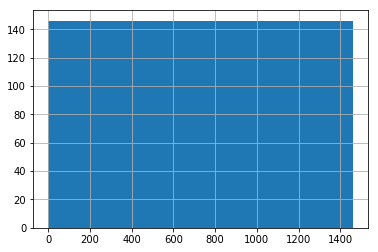

MSSubClass


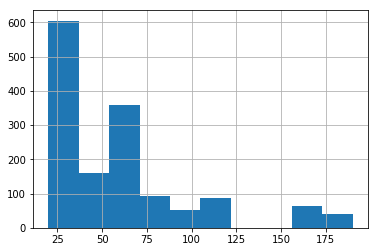

LotArea


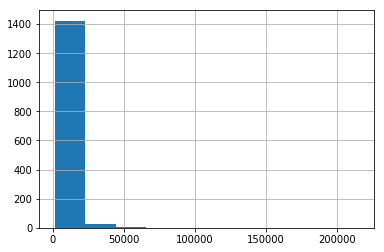

OverallQual


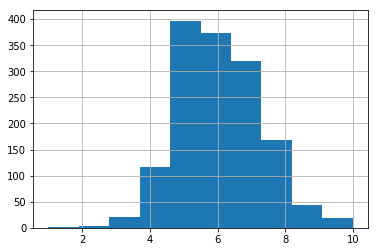

OverallCond


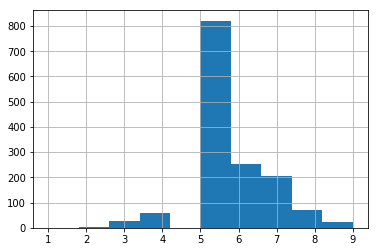

YearBuilt


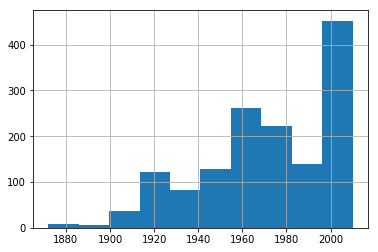

YearRemodAdd


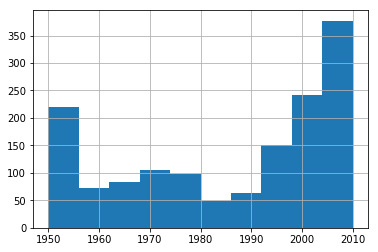

BsmtFinSF1


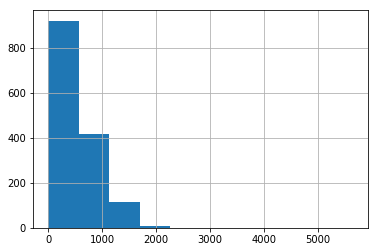

BsmtFinSF2


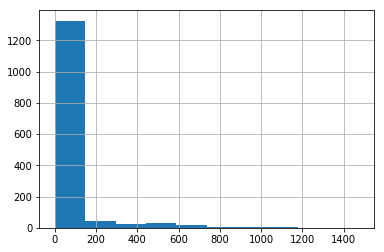

BsmtUnfSF


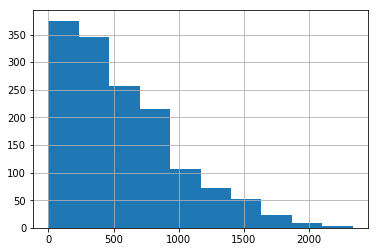

TotalBsmtSF


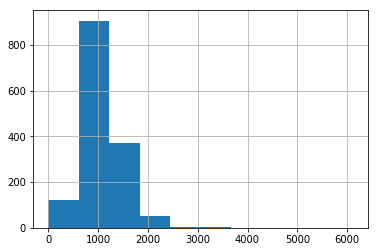

1stFlrSF


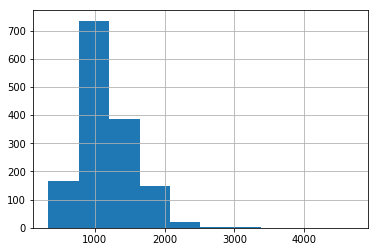

2ndFlrSF


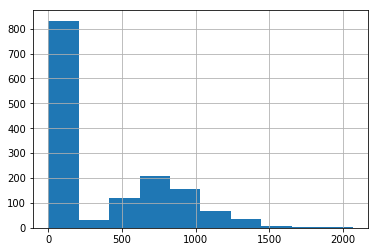

LowQualFinSF


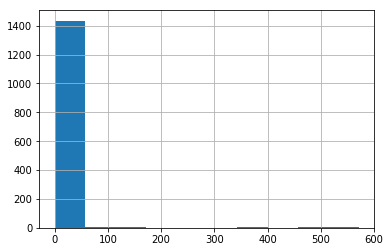

GrLivArea


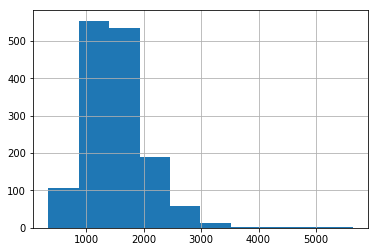

BsmtFullBath


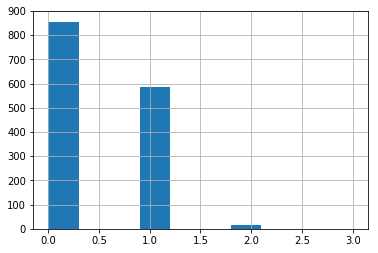

BsmtHalfBath


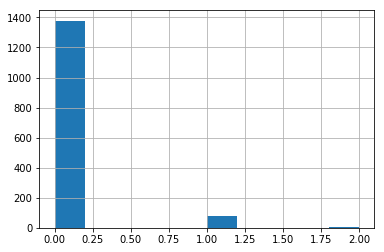

FullBath


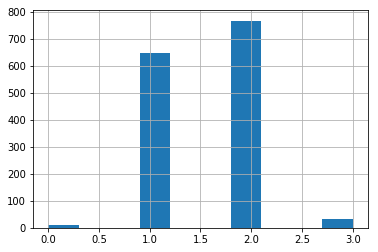

HalfBath


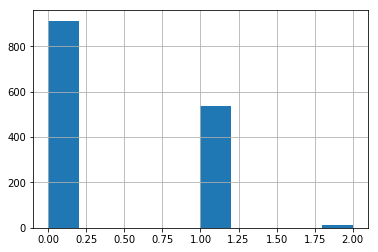

BedroomAbvGr


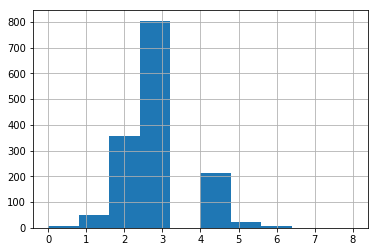

KitchenAbvGr


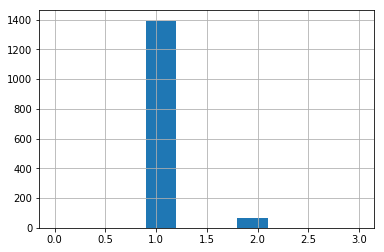

TotRmsAbvGrd


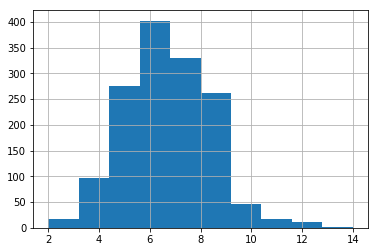

Fireplaces


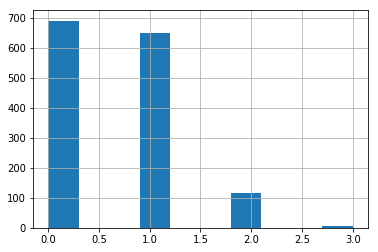

GarageCars


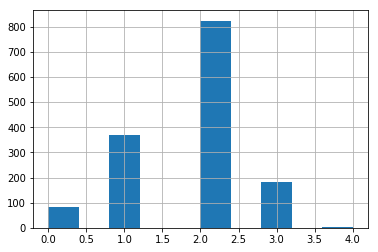

GarageArea


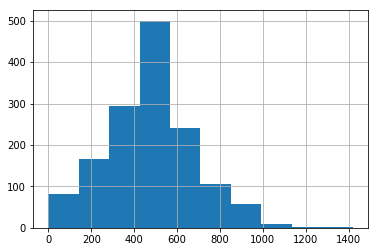

WoodDeckSF


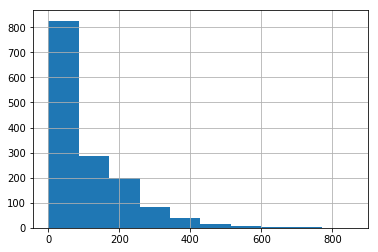

OpenPorchSF


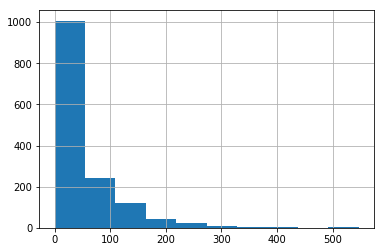

EnclosedPorch


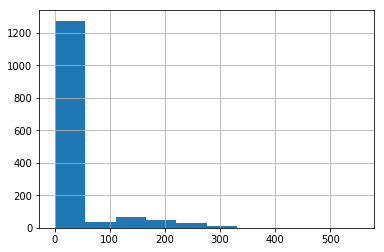

3SsnPorch


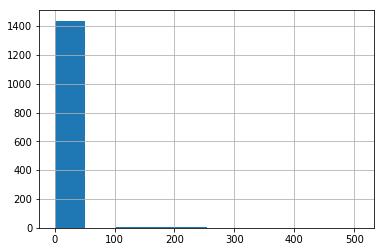

ScreenPorch


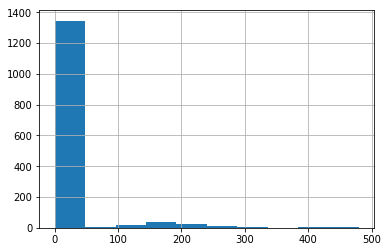

PoolArea


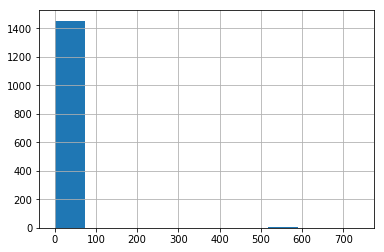

MiscVal


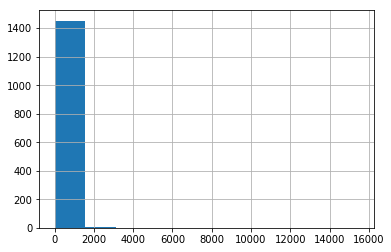

MoSold


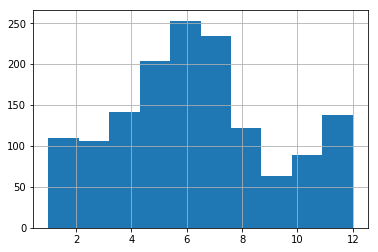

YrSold


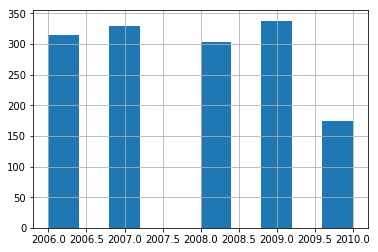

SalePrice


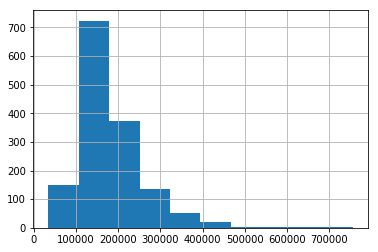

LotFrontage


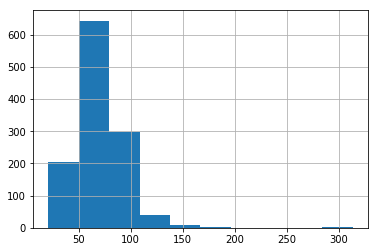

MasVnrArea


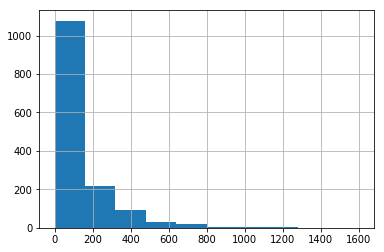

GarageYrBlt


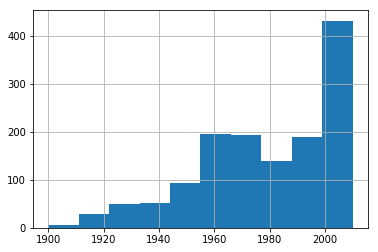

In [8]:
# Printing out all univariate graphs
for col in intList:
    print(col)
    main[col].hist()
    plt.show()

for col in floatList:
    print(col)
    main[col].hist()
    plt.show()

In [41]:
# Number of categorical variables for the strings list
main[objectList].apply(pd.Series.value_counts).count()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
ExterQual         4
ExterCond         5
Foundation        6
Heating           6
HeatingQC         5
CentralAir        2
KitchenQual       4
Functional        7
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [34]:
# Number of additional rows we would have if we created a dummy for all of them. 
main[objectList].apply(pd.Series.value_counts).count().sum()

182

When do we finish preprocessing
- Imputer for missing data?
- Scaling or Normalization?
- Polynomial features?
- Log transformer?
- Outliers?


Brute force it.
Everything downwards it not repeatable. Categorical variables from the float and integer lists still need to be found.

In [42]:
# Change all current String columns to dummies, since after a look, all the results are categorical.
# Technically, the dataset is ready to be "learned from". The results will not be accurate though. 
train_df = pd.get_dummies(main[full], columns=objectList, drop_first=True)
# train_df = pd.get_dummies(main, columns=objectList, drop_first=True)
y = train_df.pop("SalePrice")


In [43]:
train_df.shape

(1460, 189)

In [44]:
train_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
train_x, test_x, train_y, test_y = train_test_split(train_df, y, test_size=0.2, random_state=42)

train_x = pca.fit_transform(train_x)
test_x = pca.transform(test_x)

In [172]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import metrics
from keras.layers import Dropout
from keras.layers import ActivityRegularization

unit = 1000
model = Sequential()

# model.add(Dense(units=unit, activation="relu", input_dim=100))
# model.add(Dense(units=unit, activation="relu", input_dim=unit))

model.add(Dense(units=unit, activation="relu", input_dim=100))
ActivityRegularization(l1=0.01,l2=0.2)
Dropout(0.1)
model.add(Dense(units=unit, activation="relu", input_dim=unit))
# Dropout(0.1)

model.add(Dense(units=1, input_dim=unit))

sgd = optimizers.SGD(lr=1, momentum=0.90, decay=0.8)
model.compile(loss='mean_squared_error', optimizer='adam')


model.fit(train_x, train_y, epochs=50, batch_size=16, verbose=1)

# Predict and measure
score = model.evaluate(test_x, test_y, batch_size=32, verbose=0)
scores=[]
scores.append(score)
print(score)

Epoch 1/50
1168/1168 [==============================] - 2s 2ms/step - loss: 67974581724.9315
Epoch 2/50
1168/1168 [==============================] - 0s 261us/step - loss: 20860965817.8630
Epoch 3/50
1168/1168 [==============================] - 0s 267us/step - loss: 11117401010.8493
Epoch 4/50
1168/1168 [==============================] - 0s 282us/step - loss: 6950779490.1918
Epoch 5/50
1168/1168 [==============================] - 0s 266us/step - loss: 4231582702.4658
Epoch 6/50
1168/1168 [==============================] - 0s 266us/step - loss: 3385484621.1507
Epoch 7/50
1168/1168 [==============================] - 0s 268us/step - loss: 3177175316.6027
Epoch 8/50
1168/1168 [==============================] - 0s 263us/step - loss: 2890818117.2603
Epoch 9/50
1168/1168 [==============================] - 0s 265us/step - loss: 2527171906.6301
Epoch 10/50
1168/1168 [==============================] - 0s 284us/step - loss: 2474477663.5616
Epoch 11/50
1168/1168 [==============================] - 0

In [173]:
print(model.predict(test_x[0:5]))
# print(test_y[0])
# print(model.predict(test_x.iloc[0:5,:]))
print(test_y.iloc[0:5,])

[[123805.01]
 [310571.16]
 [106239.51]
 [ 93714.65]
 [286388.4 ]]
892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64


First time score = 39380513366.50228      
lr=0.015 6978095520.146119
lr=0.010 406849173831.3059
lr=0.020 7015799267.945206
mom=0.80 508905023198.10046
dec=0.00 7066894092.858447 
batch 64 331770609140.3105
batch 64 7148174967.232877

Seems to settle around 7,000,000,000

This is pretty bad because the model is only predicting one output. 

Running PCA and removing missing elements helped me get out of the rut of a broken single output.




In [144]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(train_x, train_y)
print( np.sum(((reg.predict(test_x)-test_y)**2)/test_x.shape[0]) )

1131509728.5417929


In [147]:
print(reg.predict(test_x[0:5]))
print(test_y[0:5])

[162491.632222   320420.19214186  97868.28655872 175319.22809413
 296356.39969626]
892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64
